In [7]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
np.random.seed(1)

In [71]:
N = 50
z = np.random.normal(0,2,N)
x = 1.3*z + np.random.normal(0,2,N)
a = x+np.random.normal(0,2,N) # confounder
y = x+a+np.random.normal(0,2,N)

In [72]:
reduced_form = sm.OLS(y,sm.add_constant(z)).fit()
first_stage = sm.OLS(x,sm.add_constant(z)).fit()
iv = sm.OLS(y, sm.add_constant(first_stage.fittedvalues)).fit()
z_grid = np.linspace(min(z),max(z))
x_grid = np.linspace(min(x), max(x))
xhat_grid = np.linspace(min(first_stage.fittedvalues),max(first_stage.fittedvalues))

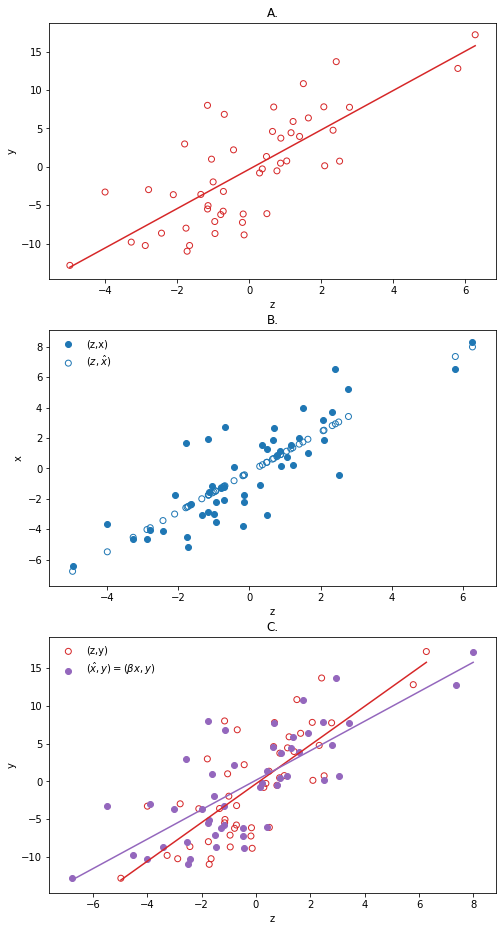

In [73]:
fig, axes = plt.subplots(3,1, figsize=(8,16))
axes = axes.flatten()
axes[0].scatter(z,y,edgecolors='tab:red',facecolor='none',label='(z,y)')
axes[0].plot(z_grid,reduced_form.params[0]+reduced_form.params[1]*z_grid,color='tab:red')
axes[0].set(xlabel='z',ylabel='y')
axes[0].title.set_text('A.')

axes[1].scatter(z,x, color='tab:blue', label='(z,x)')
axes[1].scatter(z, first_stage.fittedvalues,edgecolor='tab:blue', facecolor='none',label=r'$(z,\hat{x})$')
axes[1].set(xlabel='z',ylabel='x')
axes[1].legend(framealpha=0)
axes[1].title.set_text('B.')

axes[2].scatter(z,y,edgecolors='tab:red',facecolor='none',label='(z,y)')
axes[2].scatter(first_stage.fittedvalues,y,color='tab:purple',label=r'$(\hat{x},y)=(\beta x,y)$')
axes[2].plot(z_grid,reduced_form.params[0]+reduced_form.params[1]*z_grid,color='tab:red')
axes[2].plot(xhat_grid, iv.params[0]+iv.params[1]*xhat_grid,color='tab:purple')
axes[2].legend(framealpha=0)
axes[2].set(xlabel='z',ylabel='y')
axes[2].title.set_text('C.')

fig.savefig('IV.pdf')

# Vil vise at IV bare tar effekt fra compliers

In [79]:
N = 50

a = x+np.random.normal(0,2,N) # confounder
z = np.random.normal(0,2,N) # instrument
complier = np.r_[np.zeros(int(N/2)),np.ones(int(N/2))].astype(bool) # indikator for om responsiv 

x = np.zeros(N)
y = np.zeros(N)

for n in range(N): # må finnes smartere måte
    if complier[n]:
        x[n] = 2*z[n]+np.random.normal()
        y[n] = a[n]+x[n]
    else:
        x[n] = np.random.normal()
        y[n] = a[n]-x[n]
        
y = y+np.random.normal(0,2,N)

In [80]:
first_stage = sm.OLS(x,sm.add_constant(z)).fit()
reduced_form = sm.OLS(y,sm.add_constant(z)).fit()
iv = sm.OLS(y, sm.add_constant(first_stage.fittedvalues)).fit()
z_grid = np.linspace(min(z),max(z))
x_grid = np.linspace(min(x), max(x))
xhat_grid = np.linspace(min(first_stage.fittedvalues),max(first_stage.fittedvalues))

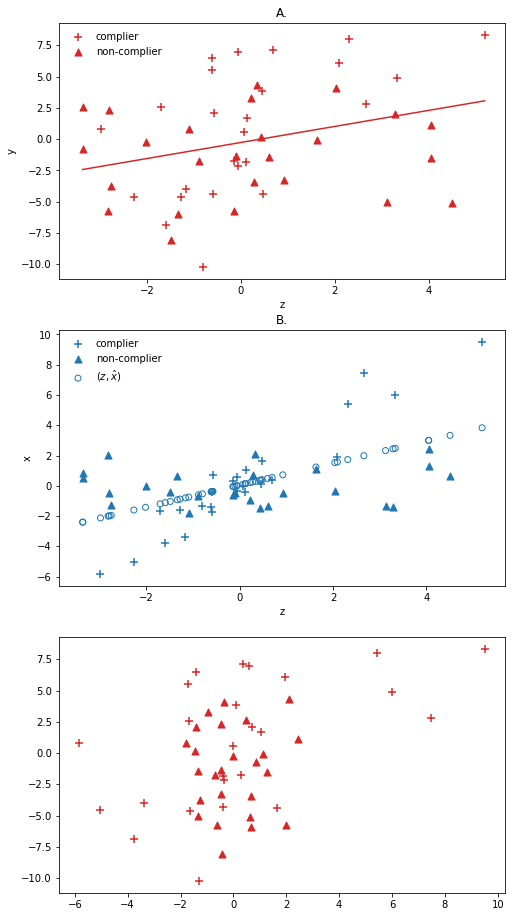

In [88]:
fig, axes = plt.subplots(3,1, figsize=(8,16))
axes = axes.flatten()
axes[0].scatter(z[complier],y[complier],s=70,marker = '+', color='tab:red',label='complier')
axes[0].scatter(z[~complier],y[~complier],s=50, marker='^', color='tab:red',label='non-complier')
axes[0].plot(z_grid,reduced_form.params[0]+reduced_form.params[1]*z_grid,color='tab:red')
axes[0].set(xlabel='z',ylabel='y')
axes[0].legend(framealpha=0)
axes[0].title.set_text('A.')

axes[1].scatter(z[complier],x[complier],s=70,marker = '+', color='tab:blue',label='complier')
axes[1].scatter(z[~complier],x[~complier],s=50, marker='^', color='tab:blue',label='non-complier')
axes[1].scatter(z, first_stage.fittedvalues,edgecolor='tab:blue', facecolor='none',label=r'$(z,\hat{x})$')
axes[1].set(xlabel='z',ylabel='x')
axes[1].legend(framealpha=0)
axes[1].title.set_text('B.')

axes[2].scatter(x[complier],y[complier],s=70,marker = '+', color='tab:red',label='complier')
axes[2].scatter(x[~complier],y[~complier],s=50, marker='^', color='tab:red',label='non-complier')


hmmm ble litt skuff det der. og jeg synes multi-level modelling var litt skuff også. blir fort veldig baysete og det blir liksom en helt annen greie. vil holde meg til økonometri og klassisk inferens, kanskje litt mle. men må få cluster i hvert fall da...

gjør ferdig prosjekt, så finner jeg emner jeg skal ta neste sememester ogb egynner å blaste som faen.
